# Simple Gravitational Orbits

16/02/23

In this notebook I will be investigating two simple gravitational orbit problems, using Euler's method and the velocity Verlet method. 

For Euler's method we will consider a small mass orbiting a large mass which will be fixed in position.

For the velocity Verlet method we will be simulating two masses both moving and orbiting their centre of mass.

The force for both these methods is calculated using Newton's law of universal gravitation:

$$ \textbf{F}_1 = \frac{G m_1 m_2}{{r_{12}}^3} \textbf{r}_{12} $$

Where $\textbf{F}_1$ is the force on object 1 due to object 2 and $\textbf{r}_{12}$ is the vector between the two objects.

$$$$


From classical mechanics we know that angular momentum and energy should be conserved throughout the orbit, so we will test this to give us a clue as to the accuracy of the method. We will also be setting $G=1$ throughout so not worry about the units of everything, rather look at the patterns the solvers show.



In [1]:
#Import statements
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def force(r1,r2,m1,m2):
    """
    Calculates the gravitational force on mass m1 due to mass m2.
    Inputs:
    r1: Position of mass 1
    r2: Position of mass 2
    m1: Mass value of mass 1
    m2: Mass value of mass 2
    Returns:
    f_on_m1: The force on mass m1
    Global variables used:
    G: Value of gravitational constant
    """
    # Find r_12 and its magnitude
    
    r_12 = r2 - r1
    r_12_mag = np.linalg.norm(r_12)
    
    #Calculate the force
    f_on_m1 = (G * m1 * m2 * r_12)/(r_12_mag**3)
    return f_on_m1

## Fixed mass: Euler

For the case of a fixed central mass, we will be using Euler's method. This is the simpler of the two differential equation solvers, but also less accurate with a global error of $\Delta t$ as opposed to $(\Delta t)^2$ for the velocity Verlet method.
$\newline$
It works using the formulas:

$$\textbf{r}_{n+1} =  \textbf{r}_n + \Delta t \frac{d \textbf{r}_n}{dt} \newline 
\textbf{v}_{n+1} =  \textbf{v}_n + \Delta t \frac{d \textbf{v}_n}{dt} $$

Where

$$ \frac{d \textbf{r}_n}{dt} = \textbf{v}_n \; ;\frac{d\textbf{v}_n}{dt} = \frac{\textbf{F}_n}{m} $$

We propegate through this for the number of steps required, in this case making sure we have at least 2 full orbits. 

For the Euler method $\Delta t$ has to be sufficiently small otherwise the error increases and stability of the equation solver can be poor.

In [3]:
# Set up parameters
Ndim = 2     
Nsteps = 20
dt = 1/1000
G = 1        
m1 = 0.0001  # Small
m2 = 1.0     # Large
Ntotal = int(Nsteps/dt) # Total number of data points of t
t_arr = np.linspace(0, Ntotal*dt, Ntotal+1)

# Set up storage for positions
r1 = np.zeros((Ntotal + 1, Ndim)) #[x, y]
r2 = np.zeros((Ntotal + 1, Ndim))
v1 = np.zeros((Ntotal + 1, Ndim)) #[Vx, Vy]
v2 = np.zeros((Ntotal + 1, Ndim))

# Set up storage for energies and angular momentum
KE = np.zeros(Ntotal) #Kinetic Energy
PE = np.zeros(Ntotal) #Potential Energy
L = np.zeros(Ntotal) #Angular momentum

# Initial conditions
r1[0] = np.array((1, 0)) #[x, y]
v1[0] = np.array((0, 1)) #[Vx, Vy]  #See below for how this initial value was found


I obtained this initial value of velocity using the equation:

$$ \frac{m_1 v^2}{r} = \frac{G m_1 m_2}{r^2}$$
And with $G = m_2 = r = 1$ this reduces to:

$$ v^2 = 1 \implies v = \pm 1$$
With the value of v in the y direction due to the starting position of the object and choosing $v = +1$ so that the object rotates anti-clockwise.

I calculated the angular momentum using the formula:
$$ L = mvr$$
The Kinetic energy using the formula:
$$ KE = \frac{1}{2} m v^2$$
and the Potential energy using the formula:
$$ PE = - \frac{G m_1 m_2}{r} $$

In [4]:
%%timeit -r2 #Timing Euler method
# Propagating Euler
for i in range(Ntotal):
    f1 = force(r1[i], r2[i], m1, m2) #Calculate the force on mass 1 
    # v1 at next step = v1 at this step + dt * dv/dt
    dv = f1/m1
    v1[i+1] = v1[i] + dt * dv
    # r1 at next step = r1 at this step + dt * dr/dt
    r1[i+1] = r1[i] + dt * v1[i]
    # Calculate energies 
    KE[i] = 1/2 * m1 * np.linalg.norm(v1[i])**2
    PE[i] = - (G * m1 * m2)/np.linalg.norm(r1[i])
    L[i] = m1 * np.linalg.norm(v1[i]) * np.linalg.norm(r1[i])

997 ms ± 5.62 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


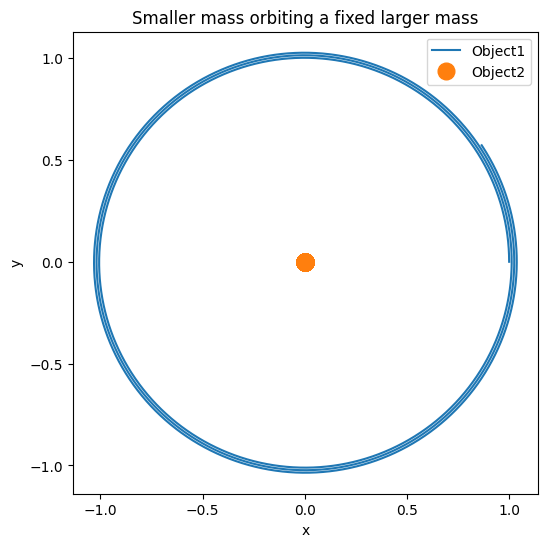

In [5]:
# Plot orbit of x vs y for orbit
plt.figure(figsize=(6, 6))
plt.plot(r1[:, 0], r1[:, 1], label="Object1")
plt.plot(r2[:, 0], r2[:, 1], 'o', markersize=12, label="Object2")

# Adding a title and axes labels
plt.title('Smaller mass orbiting a fixed larger mass')
plt.xlabel("x");
plt.ylabel("y");
plt.legend()

<IPython.core.display.Javascript object>


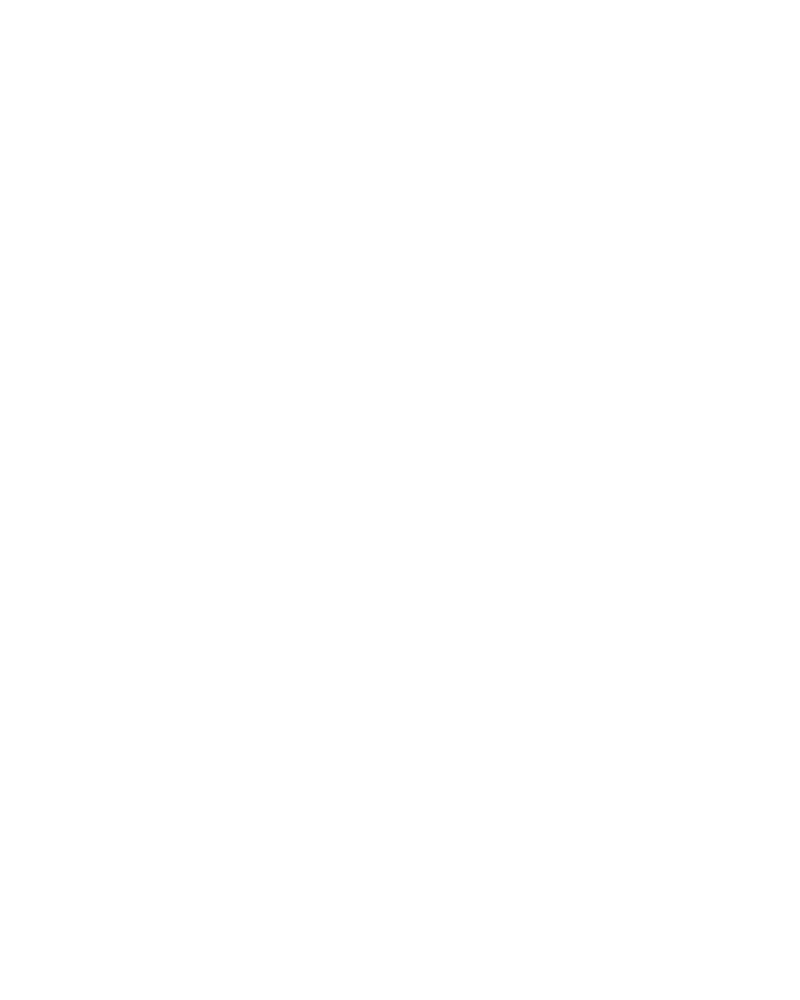

In [6]:
#Plotting the total energy and angular momentum against time
%matplotlib notebook
Etot = KE + PE

fig = plt.figure(figsize = (8, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(t_arr[1:], Etot)
ax1.set_title("Total Energy of orbit system");
ax1.set(xlabel = "time (t)", ylabel = "$E_{tot}$");

ax2.plot(t_arr[1:], L)
ax2.set_title("Angular momentum of orbit system");
ax2.set(xlabel = "time (t)", ylabel = "$L$");

### Review of Euler

From these graphs we can see that the total energy and angular momentum both increase linearly throughout the plotting, however this is a very small amount. This is due to the Euler method of solving the differential equation creating an orbit that actually spirals outwards. How much this spirals outwards depends on the value of dt, with a larger value giving a larger outward spiral.

This shows that while Euler does work, it requires the step size being very small and still has some errors.

#### Making an animation of the plot
This was not required in the task and is extra work, I was just interested to see if you could animate the plot of the orbit using matplotlib rather than just plotting a line.

<IPython.core.display.Javascript object>


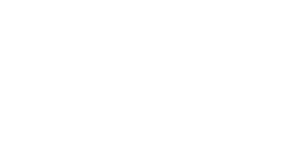

In [7]:
#EXTRA WORK - 17/02/23
#If doing a restart and run all in jupyter, this sometimes needs to be run again seprately

import matplotlib.animation as anim
%matplotlib notebook

plt.style.use('dark_background') # Making the baground to the plot dark

fig = plt.figure() 
ax = plt.axes(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
# Adding text to the plot
KE_text = ax.text(0.05, 0.9, '')
PE_text = ax.text(0.05, 0.9, '')
Etot_text = ax.text(0.05, 0.9, '')
L_text = ax.text(0.05, 0.9, '')

#Adding the object (mass 1) to the plot
obj1, = ax.plot([], [], 'o', lw=2, label="Object1") 

#Formatting for the text in plot
KE_template = 'KE = %.9f'
PE_template = 'PE = %.9f'
L_template = 'L = %.9f'
Etot_template = 'Total E = %.9f'

# Initialisation of object 
def init(): 
    # Creating the original object
    obj1.set_data([], []) 
    #changing the placement of the text
    KE_text.set_position((-1.45, 1.35))
    PE_text.set_position((-1.45, 1.2))
    L_text.set_position((-1.45, 0.9))
    Etot_text.set_position((-1.45, 1.05))
    return obj1, KE_text, PE_text, L_text, Etot_text



def animate(t):
    """
    Sets the x and y points for the animation at time t 
    as well as updating the values of the energy and angular momentum
    Inputs:
    t: time
    Returns:
    obj1: The object with new positions added
    KE_text, PE_text, Etot_text, L_text: The texts with updated values
    """
    # Updating the position of the line every 10 points from the Euler method 
    #  so that that the animation runs faster, but does make the graph look more jumpy.
    obj1.set_data(r1[t*10, 0], r1[t*10, 1])  

    
    KE_text.set_text(KE_template % KE[t])
    PE_text.set_text(PE_template % PE[t])
    L_text.set_text(L_template % L[t])
    Etot_text.set_text(Etot_template % Etot[t])
    
    
    return obj1, KE_text, PE_text, L_text, Etot_text
    
# Adding a title and axes labels
plt.title('Smaller mass orbiting a fixed larger mass animation')
plt.xlabel("x")
plt.ylabel("y")

# Plotting mass 1
m1_anim = anim.FuncAnimation(fig, animate, init_func=init, frames=620, interval=1, blit=True)
# Plotting mass 2 - Fixed in this exercise so just plotted as a point
m2_anim = plt.plot(0,0, "o-", markersize=12, label="Object2")

plt.legend(loc='lower right')




In [8]:
#Reverting back to normal matplotlib inline style
%matplotlib inline
plt.style.use('default')

## Both objects moving: velocity Verlet

For the case where both objects are orbiting their common centre of mass we will use the more accurate and reliable velocity Verlet method which has a global error of $(\Delta t)^2$.

This method works using the formula:

$$\textbf{r}(t+\Delta t) = \textbf{r}(t) + \Delta t \, \textbf{v}(t) + \Delta t^2 \frac{\textbf{F}(t)}{2m} \newline \newline
\textbf{v}(t + \Delta t) = \textbf{v}(t) + \Delta t \frac{\textbf{F}(t) + \textbf{F}(t + \Delta t)}{2m}$$

For this method we will be setting the masses much closer in value ($m_1 = 1, m_2 = 1.5$).

In [9]:
# Set up number of steps, masses, timestep again
V_Ndim = 2     
V_Nsteps2 = 20
V_dt = 1/1000
V_G = 1        
V_m1 = 1.0  # Small
V_m2 = 1.5     # Large
V_Ntotal = int(Nsteps/dt) # Total number of data points of t
V_t_arr = np.linspace(0, Ntotal*dt, Ntotal+1)

# Set up storage for positions
V_r1 = np.zeros((V_Ntotal + 1, V_Ndim)) #[x, y]
V_r2 = np.zeros((V_Ntotal + 1, V_Ndim))
V_v1 = np.zeros((V_Ntotal + 1, V_Ndim)) #[Vx, Vy]
V_v2 = np.zeros((V_Ntotal + 1, V_Ndim))

# Set up storage for energies and angular momentum
V_KE1 = np.zeros(V_Ntotal) #Kinetic Energy
V_PE1 = np.zeros(V_Ntotal) #Potential Energy 
V_L1 = np.zeros(V_Ntotal) #Angular momentum

V_KE2 = np.zeros(V_Ntotal) #Kinetic Energy
V_PE2 = np.zeros(V_Ntotal) #Potential Energy
V_L2 = np.zeros(V_Ntotal) #Angular momentum

# Initial conditions (see below for explanation of these values)
V_r1[0] = np.array((0.6, 0)) #[x, y]
V_r2[0] = np.array((-0.4, 0)) #[x, y]
V_v1[0] = np.array((0, -np.sqrt(0.9))) 
V_v2[0] = np.array((0, np.sqrt(0.4)))




## Initial conditions:

Wanting to place the centre of mass at the origin and the objects 1 unit apart with both lying on the x axis, I had to solve the simultaneous equations:

$$ |x_1| + |x_2| = 1, \; \frac{m_1 x_1 + m_2 x_2}{m_1 + m_2} = 0 $$
Which with $m_1 = 1$ and $m_2 = 1.5$ gives $x_1 = 0.6$ and $x_2 = -0.4$

To calculate the initial velocities of the two masses I used the equations:

$$ \frac{m_1 v_1^2}{r_1} = \frac{G m_1 m_2}{r_{12}}$$

$$ \frac{m_2 v_2^2}{r_2} = \frac{G m_1 m_2}{r_{12}}$$

Where $r_{12}$ is the distance between the objects = 1 and $r_1 = 0.6$, $r_2 = 0.4$ we get the values for initial velocities:
$$ v_1 = -\sqrt{0.9},\, v_2 = \sqrt{0.4}$$

I chose the negative root for $v_1$ so that I got circular orbits, rather than both objects with initial velocity in the same direction, which gives large accelerations towards each other.



In [10]:
%%timeit -r2 #Timing Velocity Verlet method
#Verlet method
for i in range(V_Ntotal):
    # Find forces on masses at this timestep
    f1 = force(V_r1[i], V_r2[i], V_m1, V_m2)
    f2 = force(V_r2[i], V_r1[i], V_m2, V_m1)
    
    # Update positions using velocity Verlet
    V_r1[i+1] = V_r1[i] + V_dt*V_v1[i] + V_dt**2 * f1/(2*V_m1)
    V_r2[i+1] = V_r2[i] + V_dt*V_v2[i] + V_dt**2 * f2/(2*V_m2)
    
    # Find forces at new timestep (remember that you have to store previous forces)
    f1new = force(V_r1[i+1], V_r2[i+1], V_m1, V_m2)
    f2new = force(V_r2[i+1], V_r1[i+1], V_m2, V_m1)
    
    # Update velocities using velocity Verlet
    V_v1[i+1] = V_v1[i] + V_dt * (f1 + f1new)/(2*V_m1)
    V_v2[i+1] = V_v2[i] + V_dt * (f2 + f2new)/(2*V_m2)
    
    # Store energies
    V_KE1[i] =  1/2 * V_m1 * np.linalg.norm(V_v1[i])**2
    V_PE1[i] = - (V_G * V_m1 * V_m2)/np.linalg.norm(V_r1[i])
    V_L1[i] = V_m1 * np.linalg.norm(V_v1[i]) * np.linalg.norm(V_r1[i])
    
    V_KE2[i] =  1/2 * V_m2 * np.linalg.norm(V_v2[i])**2
    V_PE2[i] = - (V_G * V_m2 * V_m1)/np.linalg.norm(V_r2[i])
    V_L2[i] = V_m2 * np.linalg.norm(V_v2[i]) * np.linalg.norm(V_r2[i])
    

3.91 s ± 172 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


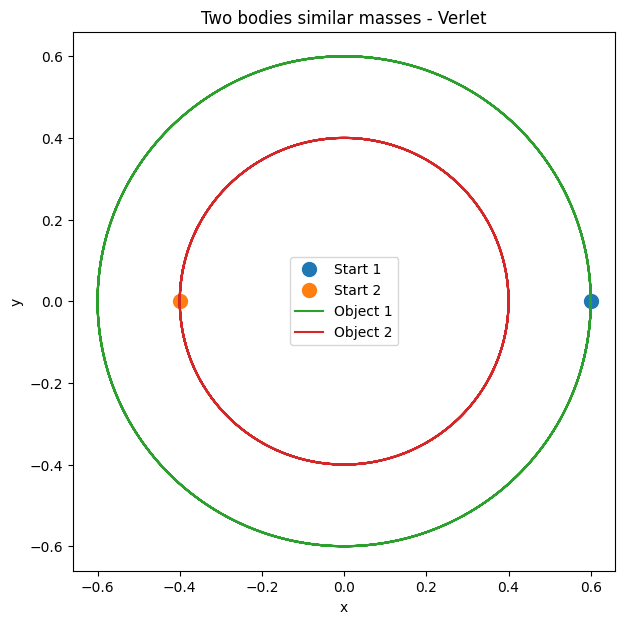

In [11]:
# Plot orbit of x vs y for orbit using Verlet method
plt.figure(figsize=(7, 7))
plt.plot(V_r1[0, 0], V_r1[0, 1], 'o', ms = 10, label = 'Start 1')
plt.plot(V_r2[0, 0], V_r2[0, 1], 'o', ms = 10, label = 'Start 2')
plt.plot(V_r1[:, 0], V_r1[:, 1], label='Object 1')
plt.plot(V_r2[:, 0], V_r2[:, 1], label = 'Object 2')

plt.legend()

# Adding a title and axes labels
plt.title('Two bodies similar masses - Verlet')
plt.xlabel("x");
plt.ylabel("y");

<IPython.core.display.Javascript object>


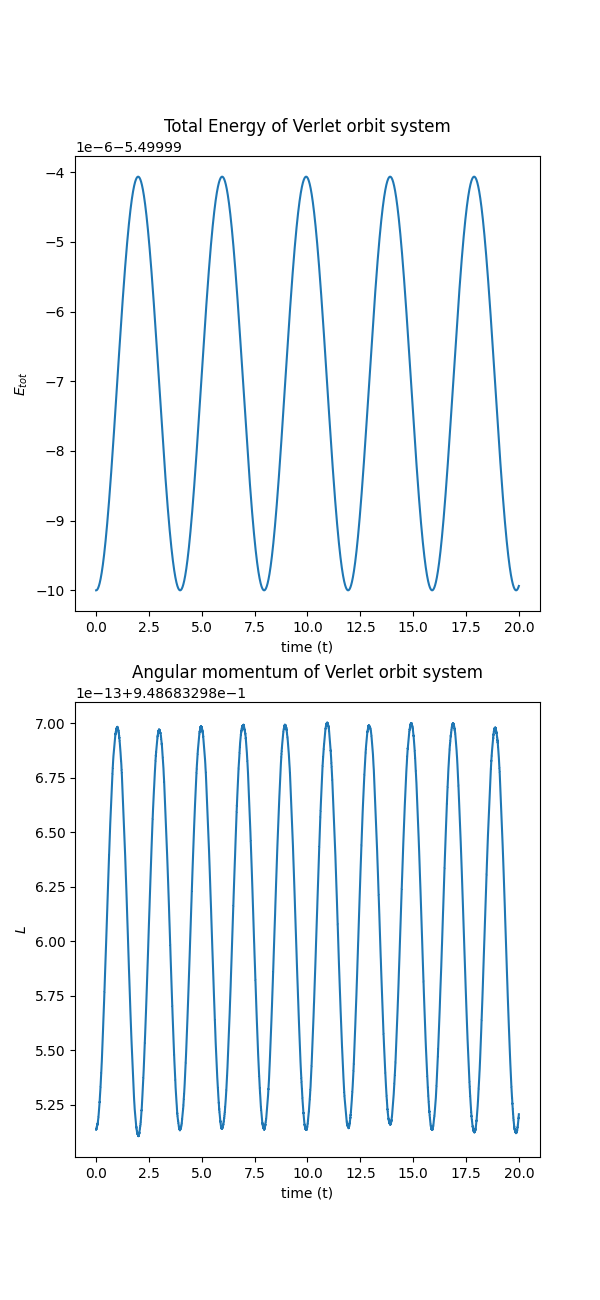

In [18]:
%matplotlib notebook
plt.style.use('default')
#Calculating total energy
V_Etot = V_KE1 + V_KE2 + V_PE1 + V_PE2
V_Ltot = V_L1 + V_L2

#Plotting Energy and angular momentum
fig = plt.figure(figsize = (6, 13))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(V_t_arr[1:], V_Etot)
ax1.set_title("Total Energy of Verlet orbit system");
ax1.set(xlabel = "time (t)", ylabel = "$E_{tot}$");

ax2.plot(V_t_arr[1:], V_Ltot)
ax2.set_title("Angular momentum of Verlet orbit system");
ax2.set(xlabel = "time (t)", ylabel = "$L$");


### Review of velocity Verlet

From these graphs we can clearly see that it is not perfect as we do not get a completely flat line in the energies, instead seeing sinosoidal oscillations. We can see however that the extend of these oscillations are much smaller than with the Euler method. They are on the order of magnitude of 1e-6 compared to 1e-5 for the total energy and 1e-15 compared to 1e-4 for the angular momentum.

Looking at the plot of the positions of the objects, we can also see that they don't spiral outwards by any discernable amount.

<IPython.core.display.Javascript object>


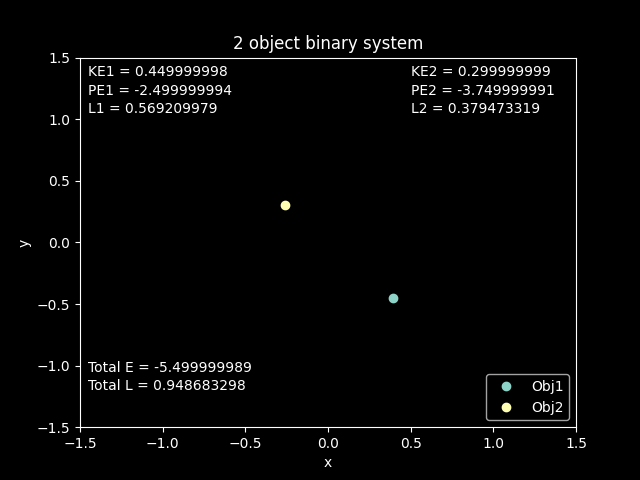

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [13]:
# Making the animation for the Verlet method
#If doing a restart and run all in jupyter, this sometimes needs to be run again seprately
%matplotlib notebook

plt.style.use('dark_background') # Making the baground to the plot dark

fig = plt.figure() 
ax = plt.axes(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
# Adding text to the plot
KE1_text = ax.text(0.05, 0.9, '')
PE1_text = ax.text(0.05, 0.9, '')
L1_text = ax.text(0.05, 0.9, '')
KE2_text = ax.text(0.05, 0.9, '')
PE2_text = ax.text(0.05, 0.9, '')
L2_text = ax.text(0.05, 0.9, '')

Etot_text = ax.text(0.05, 0.9, '')
Ltot_text = ax.text(0.05, 0.9, '')


#Adding the object (mass 1) to the plot
obj1, = ax.plot([], [], 'o', lw=2, label="Obj1") 
obj2, = ax.plot([], [], 'o', lw=2, label="Obj2") 

#Formatting for the text in plot
KE1_template = 'KE1 = %.9f'
PE1_template = 'PE1 = %.9f'
L1_template = 'L1 = %.9f'
KE2_template = 'KE2 = %.9f'
PE2_template = 'PE2 = %.9f'
L2_template = 'L2 = %.9f'

Etot_template = 'Total E = %.9f'
Ltot_template = 'Total L = %.9f'

# Initialisation of object 
def init(): 
    # Creating the original object
    obj1.set_data([], []) 
    obj2.set_data([], [])
    #changing the placement of the text
    KE1_text.set_position((-1.45, 1.35))
    PE1_text.set_position((-1.45, 1.2))
    L1_text.set_position((-1.45, 1.05))
    KE2_text.set_position((0.5, 1.35))
    PE2_text.set_position((0.5, 1.2))
    L2_text.set_position((0.5, 1.05))
    
    Ltot_text.set_position((-1.45, -1.2))
    Etot_text.set_position((-1.45, -1.05))
    return obj1, obj2, KE1_text, PE1_text, L1_text, KE2_text, PE2_text, L2_text, Etot_text, Ltot_text


# animation function 
def animate(t):
    """
    Sets the x and y points for the animation at time t 
    as well as updating the values of the energy and angular momentum
    Inputs:
    t: time
    Returns:
    obj1: The object with new positions added
    KE_text, PE_text, Etot_text, L_text: The texts with updated values
    """
    # Updating the position of the line every 10 points from the Euler method 
    # so that that the animation runs faster, but does make the graph look more jumpy.
    obj1.set_data(V_r1[t*10, 0], V_r1[t*10, 1])  
    obj2.set_data(V_r2[t*10, 0], V_r2[t*10, 1])  

    
    KE1_text.set_text(KE1_template % V_KE1[t])
    PE1_text.set_text(PE1_template % V_PE1[t])
    L1_text.set_text(L1_template % V_L1[t])
    KE2_text.set_text(KE2_template % V_KE2[t])
    PE2_text.set_text(PE2_template % V_PE2[t])
    L2_text.set_text(L2_template % V_L2[t])
    
    Etot_text.set_text(Etot_template % V_Etot[t])
    Ltot_text.set_text(Ltot_template % V_Ltot[t])
    
    
    return obj1, KE1_text, PE1_text, L1_text, KE2_text, PE2_text, L2_text, Etot_text, Ltot_text
    
# Adding a title and axes labels
plt.title('2 object binary system')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower right')

# Plotting both objects and the text
m1_anim = anim.FuncAnimation(fig, animate, init_func=init, frames=620, interval=1, blit=True)



### Conclusion

The velocity Verlet method is clearly more accurate than the Euler method, however it does also take more time to calculate the extra terms required in the calculation. The average time taken for the Verlet was more than double that of Euler for my machine. For this exercise where we are just plotting the graphs of the position either method works fine as long as the step size is small enough. As soon as you are trying to do calculate anything from the data the Verlet method is much better due to its accuracy.  